## 예제
1. test_csv 폴더 안안에 '오프라인.csv' 파일로드
2. 컬럼의 이름을 변경 -> {'기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액'}
3. 결측치가 존재하는가? 확인
4. 기준년월 데이터를 시계열 데이터로 변경
5. 성별을 기준으로 연도별 건당 이용금액의 평균이 어떻게 되는가?
    - 


In [82]:
import pandas as pd
import numpy as np
from datetime import datetime

In [83]:
df = pd.read_csv("../data/test_csv/오프라인.csv", encoding = 'cp949')

df.head(30)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
5,201901,백화점,1,50,283968,3.173608e+10
6,201901,백화점,1,60,130554,1.612223e+10
7,201901,백화점,1,70,41998,4.687676e+09
8,201901,백화점,1,80,11198,1.186133e+09
9,201901,백화점,1,90,468,2.919485e+07


In [84]:
df = df.rename(columns={
    'crym': '기준년월',
    'tco_btc_nm': '업종',
    'ma_fem_dc': '성별',
    'agegrp_dc': '연령대',
    'tco_btc_u_ct': '총이용건수',
    'tco_btc_u_am': '총이용금액'
})

In [122]:
df.describe()

,기준년월,성별,연령대,총이용건수,총이용금액
count,2648,2648.000000,2648.000000,2.648000e+03,2.648000e+03
mean,2020-04-30 19:44:57.280966912,1.504532,44.878776,3.309869e+05,1.064912e+10
min,2019-01-01 00:00:00,1.000000,0.000000,1.000000e+00,1.500000e+03
25%,2019-09-01 00:00:00,1.000000,20.000000,9.407500e+02,2.652966e+07
50%,2020-05-01 00:00:00,2.000000,40.000000,1.053975e+05,2.589632e+09
75%,2021-01-01 00:00:00,2.000000,70.000000,4.907440e+05,1.457397e+10
max,2021-09-01 00:00:00,2.000000,90.000000,2.343320e+06,1.116790e+11
std,NaN,0.500074,28.768254,4.645646e+05,1.755371e+10


In [79]:
df.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [92]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    2648 non-null   datetime64[ns]
 1   업종      2648 non-null   object        
 2   성별      2648 non-null   int64         
 3   연령대     2648 non-null   int64         
 4   총이용건수   2648 non-null   int64         
 5   총이용금액   2648 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 124.3+ KB


In [94]:
df.head(1)
df.describe()

,기준년월,성별,연령대,총이용건수,총이용금액
count,2648,2648.000000,2648.000000,2.648000e+03,2.648000e+03
mean,2020-04-30 19:44:57.280966912,1.504532,44.878776,3.309869e+05,1.064912e+10
min,2019-01-01 00:00:00,1.000000,0.000000,1.000000e+00,1.500000e+03
25%,2019-09-01 00:00:00,1.000000,20.000000,9.407500e+02,2.652966e+07
50%,2020-05-01 00:00:00,2.000000,40.000000,1.053975e+05,2.589632e+09
75%,2021-01-01 00:00:00,2.000000,70.000000,4.907440e+05,1.457397e+10
max,2021-09-01 00:00:00,2.000000,90.000000,2.343320e+06,1.116790e+11
std,NaN,0.500074,28.768254,4.645646e+05,1.755371e+10


In [147]:
df['기준년'] = df['기준년월'].dt.strftime("%Y")

In [148]:
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019
...,...,...,...,...,...,...,...
2643,2021-09-01,편의점,2,50,844081,6.283353e+09,2021
2644,2021-09-01,편의점,2,60,243768,1.997442e+09,2021
2645,2021-09-01,편의점,2,70,40523,3.524203e+08,2021
2646,2021-09-01,편의점,2,80,6349,5.333488e+07,2021


In [149]:
df22 = df[['성별','기준년','총이용건수','총이용금액']].groupby(['성별','기준년']).sum()

In [155]:
df22.pivot_table(
    "총이용금액",
    "성별",
    "기준년",
    sum
)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_20996\3935501699.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df22.pivot_table(


기준년,2019,2020,2021
성별,,,
1,3.542740e+12,3.476297e+12,2.643688e+12
2,7.210066e+12,6.485446e+12,4.840621e+12


In [156]:
import matplotlib.pyplot as plt
import platform

In [157]:
if platform.system() == "Darwin":
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = "Malgun Gothic")

<Axes: xlabel='기준년월'>

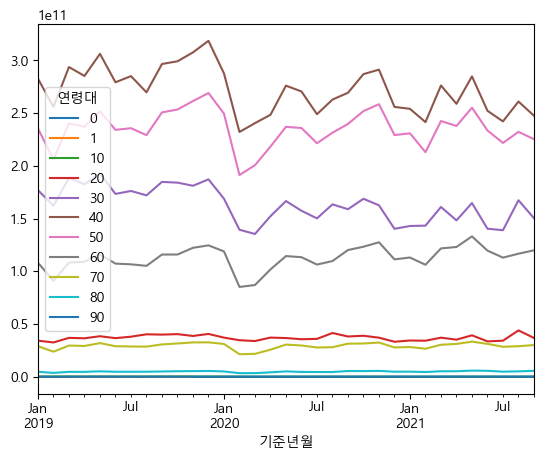

In [165]:
group_data2 = df.groupby(['기준년월', '연령대'])['총이용금액'].sum()
group_data2.unstack().plot()

In [162]:
online = pd.read_csv("../data/test_csv/온라인.csv", encoding = 'cp949')
online.head(20)

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337
5,201901,1,50,573967,44506259680
6,201901,1,60,176773,14785191922
7,201901,1,70,39041,3751640053
8,201901,1,80,5632,607601993
9,201901,1,90,196,21542552


In [163]:
online = online.rename(columns={
    'crym': '기준년월',
    'ma_fem_dc': '성별',
    'agegrp_dc': '연령대',
    'tco_btc_u_ct': '총이용건수',
    'tco_btc_u_am': '총이용금액'
})

In [ ]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format = '%Y%m')
online['기준년'] = online['기준년월'].dt.strftime("%Y")

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685


In [106]:
# 5. 성별을 기준으로 연도별 건당 이용금액의 평균이 어떻게 되는가?
df2 = df[['성별','기준년월','총이용건수','총이용금액']].groupby(['성별','기준년월']).sum()
df2

총이용건수         총이용금액
성별 기준년월                              
1  2019-01-01   9225776  2.825541e+11
   2019-02-01   8423552  2.543427e+11
   2019-03-01   9928291  2.896641e+11
   2019-04-01  10509752  2.898717e+11
   2019-05-01  11510203  3.065455e+11
...                 ...           ...
2  2021-05-01  15759087  5.972291e+11
   2021-06-01  15636723  5.350264e+11
   2021-07-01  14976022  5.033600e+11
   2021-08-01  15367513  5.398490e+11
   2021-09-01  13293729  5.257583e+11

[66 rows x 2 columns]

In [128]:
df2['건당이용금액평균'] = round(df2['총이용금액'] / df2['총이용건수'], 1)
df2

총이용건수         총이용금액  건당이용금액평균
성별 기준년월                                        
1  2019-01-01   9225776  2.825541e+11   30626.6
   2019-02-01   8423552  2.543427e+11   30194.2
   2019-03-01   9928291  2.896641e+11   29175.6
   2019-04-01  10509752  2.898717e+11   27581.2
   2019-05-01  11510203  3.065455e+11   26632.5
...                 ...           ...       ...
2  2021-05-01  15759087  5.972291e+11   37897.4
   2021-06-01  15636723  5.350264e+11   34216.0
   2021-07-01  14976022  5.033600e+11   33611.1
   2021-08-01  15367513  5.398490e+11   35129.2
   2021-09-01  13293729  5.257583e+11   39549.4

[66 rows x 3 columns]

In [129]:
df3 = df2.reset_index()

In [130]:
male = df3.loc[df3['성별'] == 1]
female = df3.loc[df3['성별'] == 2]

In [131]:
# pd.merge(left, right, how, on, left_on, right_on, left_index, right_index)

result = pd.merge(male, female, how = "outer", on = '기준년월')
result = result[['기준년월','성별_x','건당이용금액평균_x','성별_y','건당이용금액평균_y']]
result.head()

,기준년월,성별_x,건당이용금액평균_x,성별_y,건당이용금액평균_y
0,2019-01-01,1,30626.6,2,39053.7
1,2019-02-01,1,30194.2,2,38647.3
2,2019-03-01,1,29175.6,2,38096.3
3,2019-04-01,1,27581.2,2,35281.1
4,2019-05-01,1,26632.5,2,34469.9


In [ ]:
result['x>y'] = result['건당이용금액평균_x'] > result['건당이용금액평균_y']
flag = result['x>y'] == True
result.loc[flag] # male > female인 값이 없다

,기준년월,성별_x,건당이용금액평균_x,성별_y,건당이용금액평균_y,x>y


In [145]:
result.tail(20)

,기준년월,성별_x,건당이용금액평균_x,성별_y,건당이용금액평균_y,x>y
13,2020-02-01,1,25413.4,2,33161.8,False
14,2020-03-01,1,24939.5,2,32004.8,False
15,2020-04-01,1,26337.4,2,34057.5,False
16,2020-05-01,1,27220.7,2,36548.3,False
17,2020-06-01,1,25498.6,2,34952.5,False
18,2020-07-01,1,24086.3,2,31957.0,False
19,2020-08-01,1,25400.8,2,32917.3,False
20,2020-09-01,1,27433.5,2,36046.8,False
21,2020-10-01,1,27971.3,2,37913.2,False
22,2020-11-01,1,29373.5,2,39753.5,False


In [ ]:
df2.pivot_table(
    index = '성별',
    
    values='총이용금액',
    aggfunc=sum
)